# Hyperparameter Database - 

Hyperparameter is a parameter from a prior distribution, it captures the prior belief before data is observed. In any machine learning algorithms, these parameters need to be initialized before training amodel.

Hyperparameters are important because they directly control the behaviour of the training algorithm and have a significant impact on the performance of the model is being trained.

“A good choice of hyperparameters can really make an algorithm shine”.

Choosing good hyperparameters gives two benefits: -
Efficiently search the space of possible hyperparameters
Easy to manage a large set of experiments for hyperparameter tuning.

Hyperparameters are variables that we need to set before applying a learning algorithm to a dataset.The major goal of hyperparameter exploration is to search across various hyperparameter configurations to find the one that results in the optimal performance with best score or accuracy for the particular model.

## Abstract

Our main aim is to find proper hyperparameter with proper tuning for our dataset which would help the database team in modelling the database schema in an efficient way. We would create H2O models for this dataset for getting proper hyperparameters.To find the best, most important hyperparameters across different models across different runtimes is the maim moto of this project.

## Dataset

This dataset consists of the hyperparameters generated by all the different runtimes across two major models - GLM and GBM.
The GLM dataset consists of 5 records and 60 columns.
The dataset columns are as follows -                                                       
model_name - name of the model                                                               
Model run time,
nfolds,
seed,
keep_cross_validation_models,
keep_cross_validation_predictions,
keep_cross_validation_fold_assignment,
fold_assignment,
fold_column,
ignored_columns,
ignore_const_cols,
score_each_iteration,
offset_column,
weights_column,
family,
tweedie_variance_power,
tweedie_link_power,
theta,
solver,
alpha_0,alpha_1,alpha_2,alpha_3,alpha_4,alpha_5 - alpha values
lambda_0,lambda_1,lambda_2,lambda_3,lambda_4,lambda_search,
early_stopping,
nlambdas,
standardize,
missing_values_handling,
compute_p_values,
remove_collinear_columns,
intercept,
non_negative,
max_iterations,
objective_epsilon,
beta_epsilon,
gradient_epsilon,
link,
prior,
lambda_min_ratio,
beta_constraints,
max_active_predictors,
interactions,
interaction_pairs, 	obj_reg	export_checkpoints_dir,	balance_classes	class_sampling_factors,	max_after_balance_size,	max_confusion_matrix_size,	max_hit_ratio_k	max_runtime_secs,	custom_metric_func

The GLB Dataset consists of the hyperparameters generated for different runtimes - 300, 500, 1000, 1500 and 2000 seconds.
It consists of 10 records and 56 columns which are as follows - 
model_id	run_time	validation_frame	nfolds	keep_cross_validation_models	keep_cross_validation_predictions	keep_cross_validation_fold_assignment	score_each_iteration	score_tree_interval	fold_assignment	fold_column	response_column	ignored_columns	ignore_const_cols	offset_column	weights_column	balance_classes	max_after_balance_size	max_confusion_matrix_size	max_hit_ratio_k	ntrees	max_depth	min_rows	nbins	nbins_top_level	nbins_cats	r2_stopping	stopping_rounds	stopping_metric	stopping_tolerance	max_runtime_secs	seed	build_tree_one_node	learn_rate	learn_rate_annealing	distribution	quantile_alpha	tweedie_power	huber_alpha	checkpoint	sample_rate	sample_rate_per_class	col_sample_rate	col_sample_rate_change_per_level	col_sample_rate_per_tree	min_split_improvement	histogram_type	max_abs_leafnode_pred	pred_noise_bandwidth	categorical_encoding	calibrate_model	calibration_frame	custom_metric_func	export_checkpoints_dir	monotone_constraints	check_constant_response


## Using h2o -

Using H2o - H2O is an open source, distributed in-memory machine learning platform with linear scalability. H2O supports the most widely used statistical & machine learning algorithms and also has an AutoML functionality.

Using H2o the json files are genearted for 300, 500, 1000, 1500 and 2000 seconds and on summing up all the hyperparameters of the particular algorithms into csv files we are trying to predict the best and the most important hyperparameters for both GLM and GBM algorithms respectively.

## DATA CLEANING AND EXPLORATION

The primary goal of data cleaning is to detect and remove errors and anomalies to increase the value of data in analytics and decision making. While it has been the main focus of many researchers for several years, individual problems have been addressed separately. These include missing value imputation, outliers detection, handling categorical variables, data type conversions and so on.

In [280]:
#Load the necessary libraries required 
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # To split train and test dataset
from sklearn.model_selection import cross_val_score # To perform cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import random, os, sys
from datetime import datetime
import time
import json

In [281]:
#reading the hyperparameters data from csv file
glm_df=pd.read_csv("GLM.csv", sep=',')

In [283]:
#fetching the first 5 values from the dataset
glm_df.head(100)

,model_name,Model run time,nfolds,seed,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,fold_assignment,fold_column,ignored_columns,...,interaction_pairs,obj_reg,export_checkpoints_dir,balance_classes,class_sampling_factors,max_after_balance_size,max_confusion_matrix_size,max_hit_ratio_k,max_runtime_secs,custom_metric_func
0,GLM_grid_1_AutoML_20190410_190849_model_1,300,5,-1.000000e+00,False,True,False,Modulo,NaN,NaN,...,NaN,0.000003,NaN,False,NaN,5,20,0,0,NaN
1,GLM_grid_1_AutoML_20190419_184652_model_1,500,5,-3.730000e+18,False,True,False,Modulo,NaN,NaN,...,NaN,0.000003,NaN,False,NaN,5,20,0,0,NaN
2,GLM_grid_1_AutoML_20190419_193618_model_1,1000,5,-6.840000e+17,False,True,False,Modulo,NaN,NaN,...,NaN,0.000003,NaN,False,NaN,5,20,0,0,NaN
3,GLM_grid_1_AutoML_20190420_024805_model_1,1500,5,-6.300000e+18,False,True,False,Modulo,NaN,NaN,...,NaN,0.000003,NaN,False,NaN,5,20,0,0,NaN
4,GLM_grid_1_AutoML_20190420_024805_model_1,2000,5,-6.300000e+18,False,True,False,Modulo,NaN,NaN,...,NaN,0.000003,NaN,False,NaN,5,20,0,0,NaN


In [284]:
#checking the data types for dataset
glm_df.dtypes

model_name                                object
Model run time                             int64
nfolds                                     int64
seed                                     float64
keep_cross_validation_models                bool
keep_cross_validation_predictions           bool
keep_cross_validation_fold_assignment       bool
fold_assignment                           object
fold_column                              float64
ignored_columns                          float64
ignore_const_cols                        float64
score_each_iteration                     float64
offset_column                            float64
weights_column                           float64
family                                   float64
tweedie_variance_power                     int64
tweedie_link_power                         int64
theta                                    float64
solver                                    object
alpha_0                                    int64
alpha_1             

In [285]:
#checking for null values or missing value in the dataset
glm_df.isnull().any()

model_name                               False
Model run time                           False
nfolds                                   False
seed                                     False
keep_cross_validation_models             False
keep_cross_validation_predictions        False
keep_cross_validation_fold_assignment    False
fold_assignment                          False
fold_column                               True
ignored_columns                           True
ignore_const_cols                         True
score_each_iteration                      True
offset_column                             True
weights_column                            True
family                                    True
tweedie_variance_power                   False
tweedie_link_power                       False
theta                                    False
solver                                   False
alpha_0                                  False
alpha_1                                  False
alpha_2      

In [286]:
#dropping all the null values from the dataset as it is of no use in the future findings
glm_df.drop(columns=['fold_column'], axis=1, inplace=True)
glm_df.drop(columns=['custom_metric_func','export_checkpoints_dir'], axis=1, inplace=True)
glm_df.drop(columns=['beta_constraints','weights_column','family','ignored_columns'], axis=1, inplace=True)
glm_df.drop(columns=['ignore_const_cols','score_each_iteration'], axis=1, inplace=True)
glm_df.drop(columns=['offset_column'], axis=1, inplace=True)
glm_df.drop(columns=['interaction_pairs '], axis=1, inplace=True)

In [287]:
# to cross check for null values on dropping the columns
glm_df.columns.isnull().any()

False

In [288]:
#checking for the columns in the dataset
glm_df.columns

Index(['model_name', 'Model run time', 'nfolds', 'seed',
       'keep_cross_validation_models', 'keep_cross_validation_predictions',
       'keep_cross_validation_fold_assignment', 'fold_assignment',
       'tweedie_variance_power', 'tweedie_link_power', 'theta', 'solver',
       'alpha_0', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_5',
       'lambda_0', 'lambda_1', 'lambda_2', 'lambda_3', 'lambda_4',
       'lambda_search', 'early_stopping', 'nlambdas', 'standardize',
       'missing_values_handling', 'compute_p_values',
       'remove_collinear_columns', 'intercept', 'non_negative',
       'max_iterations', 'objective_epsilon', 'beta_epsilon',
       'gradient_epsilon', 'link', 'prior', 'lambda_min_ratio',
       'max_active_predictors', 'interactions', 'obj_reg', 'balance_classes',
       'class_sampling_factors', 'max_after_balance_size',
       'max_confusion_matrix_size', 'max_hit_ratio_k', 'max_runtime_secs'],
      dtype='object')

In [289]:
#cross checking the values in the dataset on dropping null values and handling categorical variables--
glm_df.head(5)

,model_name,Model run time,nfolds,seed,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,fold_assignment,tweedie_variance_power,tweedie_link_power,...,lambda_min_ratio,max_active_predictors,interactions,obj_reg,balance_classes,class_sampling_factors,max_after_balance_size,max_confusion_matrix_size,max_hit_ratio_k,max_runtime_secs
0,GLM_grid_1_AutoML_20190410_190849_model_1,300,5,-1.000000e+00,False,True,False,Modulo,0,1,...,0.0001,-1,NaN,0.000003,False,NaN,5,20,0,0
1,GLM_grid_1_AutoML_20190419_184652_model_1,500,5,-3.730000e+18,False,True,False,Modulo,0,1,...,0.0001,-1,NaN,0.000003,False,NaN,5,20,0,0
2,GLM_grid_1_AutoML_20190419_193618_model_1,1000,5,-6.840000e+17,False,True,False,Modulo,0,1,...,0.0001,-1,NaN,0.000003,False,NaN,5,20,0,0
3,GLM_grid_1_AutoML_20190420_024805_model_1,1500,5,-6.300000e+18,False,True,False,Modulo,0,1,...,0.0001,-1,NaN,0.000003,False,NaN,5,20,0,0
4,GLM_grid_1_AutoML_20190420_024805_model_1,2000,5,-6.300000e+18,False,True,False,Modulo,0,1,...,0.0001,-1,NaN,0.000003,False,NaN,5,20,0,0


In [290]:
#handling categorical variables 
glm_df=pd.get_dummies(glm_df,columns=['keep_cross_validation_models'],drop_first= True)
glm_df=pd.get_dummies(glm_df,columns=['keep_cross_validation_predictions'],drop_first=True)
glm_df=pd.get_dummies(glm_df,columns=['keep_cross_validation_fold_assignment'],drop_first=True)
glm_df=pd.get_dummies(glm_df,columns=['balance_classes'],drop_first=True)
glm_df.columns

Index(['model_name', 'Model run time', 'nfolds', 'seed', 'fold_assignment',
       'tweedie_variance_power', 'tweedie_link_power', 'theta', 'solver',
       'alpha_0', 'alpha_1', 'alpha_2', 'alpha_3', 'alpha_4', 'alpha_5',
       'lambda_0', 'lambda_1', 'lambda_2', 'lambda_3', 'lambda_4',
       'lambda_search', 'early_stopping', 'nlambdas', 'standardize',
       'missing_values_handling', 'compute_p_values',
       'remove_collinear_columns', 'intercept', 'non_negative',
       'max_iterations', 'objective_epsilon', 'beta_epsilon',
       'gradient_epsilon', 'link', 'prior', 'lambda_min_ratio',
       'max_active_predictors', 'interactions', 'obj_reg',
       'class_sampling_factors', 'max_after_balance_size',
       'max_confusion_matrix_size', 'max_hit_ratio_k', 'max_runtime_secs'],
      dtype='object')

On cleaning the dataset, considering the prediction of GLM hyperparameters first,

# Hyperparameter analysis - GLM Algorithm

Generalized linear model (GLM) is the basis of many machine-learning algorithms. GLM with first-order variables is basically linear regression, and can be analytically solved (meaning there is a formula that you can use to solve the GLM problems).It is a flexible generalization of ordinary linear regression that allows for response variables that have error distribution models other than a normal distribution. The GLM generalizes linear regression by allowing the linear model to be related to the response variable via a link function and by allowing the magnitude of the variance of each measurement to be a function of its predicted value.The link function provides the relationship between the linear predictor and the mean of the distribution function. 

### Using Pandas Profiling - Generates profile reports from a pandas DataFrame. It is used for simple and fast exploratory data analysis of a Pandas Dataframe. The base of this python module pandas_profiling that helps one in automating the first-level of EDA.

Essentials: type, unique values, missing values                                                   
Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range                      
Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness                                    
Most frequent values                                                 
Histogram                                                                        
Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes                                   

In [187]:
pandas_profiling.ProfileReport(glm_df)

Number of variables,44
Number of observations,5
Total Missing (%),4.5%
Total size in memory,1.6 KiB
Average record size in memory,319.0 B
Numeric,2
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,40


From pandas profiling we can summarize that seed and early_stopping are the best hyperparameters accordingly along with their values or ranges specified.We can also use heatmap to confirm the hyperparameters with the pandas profiling - 

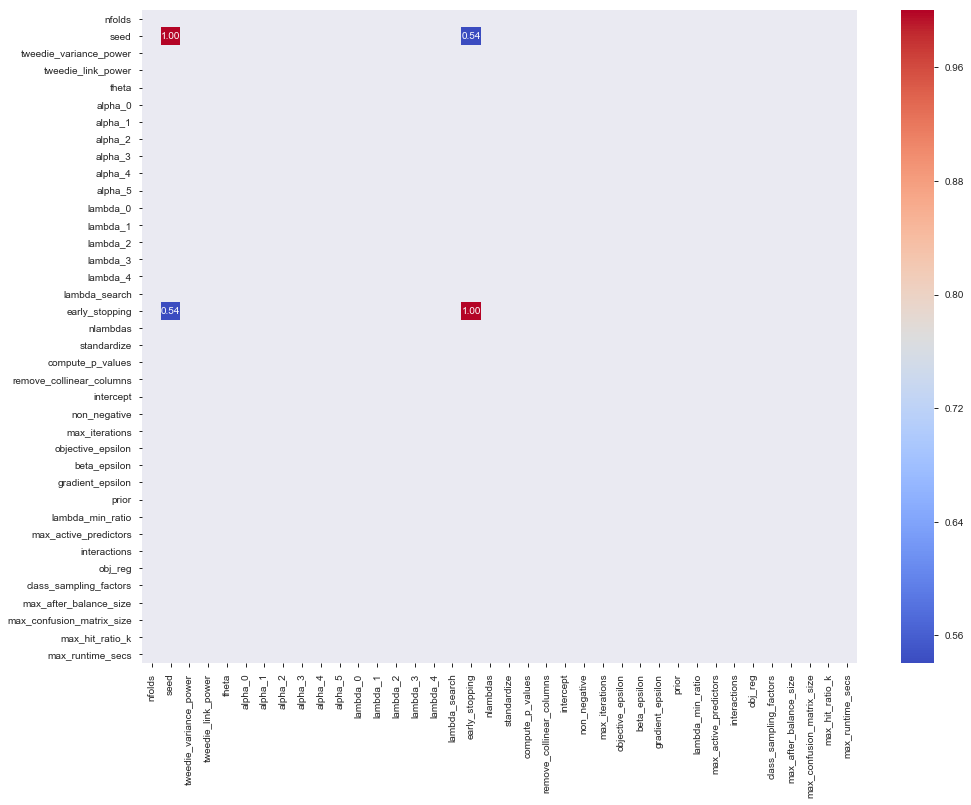

In [295]:
plt.figure(figsize=(16,12))
sns.heatmap(data=glm_df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### From the above heatmap,we can conclude that the most significant hyperparameters for GLM Algotithm are early_stopping and seed.

## Finding the range of hyperparameters (early_stopping and seed) for GLM Algorithms  -different runtimes 300,500,1000,1500 and 2000 seconds

In [359]:
param_ranges = []
for key,val in glm_df.dtypes.items():
    print(key,val)
    if val == 'int64': 
         param_ranges.append([key,[glm_df[key].min(),glm_df[key].max()]])
    if val == 'float64':
         param_ranges.append([key,[glm_df[key].min(),glm_df[key].max()]])

model_name object
Model run time int64
nfolds int64
seed float64
fold_assignment object
tweedie_variance_power int64
tweedie_link_power int64
theta float64
solver object
alpha_0 int64
alpha_1 float64
alpha_2 float64
alpha_3 float64
alpha_4 float64
alpha_5 int64
lambda_0 float64
lambda_1 float64
lambda_2 float64
lambda_3 float64
lambda_4 float64
lambda_search bool
early_stopping bool
nlambdas int64
standardize bool
missing_values_handling object
compute_p_values bool
remove_collinear_columns bool
intercept bool
non_negative bool
max_iterations int64
objective_epsilon float64
beta_epsilon float64
gradient_epsilon float64
link object
prior int64
lambda_min_ratio float64
max_active_predictors int64
interactions float64
obj_reg float64
class_sampling_factors float64
max_after_balance_size int64
max_confusion_matrix_size int64
max_hit_ratio_k int64
max_runtime_secs int64


In [360]:
param_ranges

[['Model run time', [300, 2000]],
 ['nfolds', [5, 5]],
 ['seed', [-6.3e+18, -1.0]],
 ['tweedie_variance_power', [0, 0]],
 ['tweedie_link_power', [1, 1]],
 ['theta', [1e-10, 1e-10]],
 ['alpha_0', [0, 0]],
 ['alpha_1', [0.2, 0.2]],
 ['alpha_2', [0.4, 0.4]],
 ['alpha_3', [0.6, 0.6]],
 ['alpha_4', [0.8, 0.8]],
 ['alpha_5', [1, 1]],
 ['lambda_0', [3419427.16, 3419427.16]],
 ['lambda_1', [2488985.247, 2488985.247]],
 ['lambda_2', [1811720.8730000001, 1811720.8730000001]],
 ['lambda_3', [1318743.261, 1318743.261]],
 ['lambda_4', [959907.1332, 959907.1332]],
 ['nlambdas', [30, 30]],
 ['max_iterations', [300, 300]],
 ['objective_epsilon', [0.0001, 0.0001]],
 ['beta_epsilon', [0.0001, 0.0001]],
 ['gradient_epsilon', [1e-06, 1e-06]],
 ['prior', [-1, -1]],
 ['lambda_min_ratio', [0.0001, 0.0001]],
 ['max_active_predictors', [-1, -1]],
 ['interactions', [nan, nan]],
 ['obj_reg', [2.9e-06, 2.9e-06]],
 ['class_sampling_factors', [nan, nan]],
 ['max_after_balance_size', [5, 5]],
 ['max_confusion_matrix

The common hyperparameters for GLM Algorithms in the leaderboard models are - nfolds[5,5] for all the algorithm models, seed, max_after_balance_size [5,5] for all the models, max_hit_ratio_k[0,0] for all the above mentioned leaderboard models,
max_confusion_matrix_size, max_iterations. Therefor these are all the mostly used parameters across all the models in this dataset.

From the heatmap and the pandas profiling we conclude that seed is the best hyperparameter for the above 

Seed is one of the important hyperparameter here - 
This option specifies the random number generator (RNG) seed for algorithms that are dependent on randomization. When a seed is defined, the algorithm will behave deterministically.

The seed is consistent for each H2O instance so that you can create models with the same starting conditions in alternative configurations.

In [362]:
range_metrics = [glm_df['seed'].min(),glm_df['seed'].max()]
range_metrics

[-6.3e+18, -1.0]

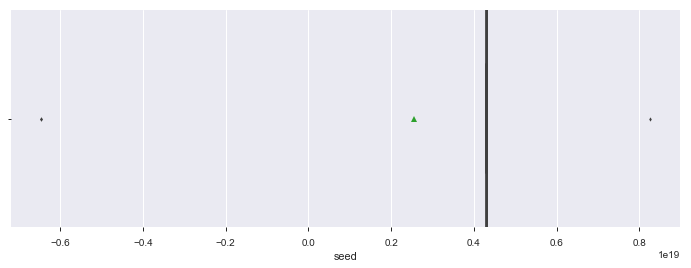

In [363]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = df_gbm["seed"], data = glm_df, orient = 'h', width = 1.0, fliersize = 3, showmeans=True, ax = ax)
plt.show()

The above bosplot visualization represents the range for the seed hyperparameter across the different models in the dataset.

In [345]:
treemin=df_gbm['ntrees'].min()
treemax=df_gbm['ntrees'].max()
seedmin=df_gbm['seed'].min()
seedmax=df_gbm['seed'].max()
srmin=df_gbm['stopping_rounds'].min()
srmax=df_gbm['stopping_rounds'].max()

### range of important hyperparameter across all run times for GLM -

In [364]:
GLM_all = pd.DataFrame({
    'Hyperparameters': ['seed'],
    'Min': [seedmin],
     'Max': [seedmax]})
GLM_all

,Hyperparameters,Min,Max
0,seed,-6.460620e+18,8.254820e+18


## Hyperparameter Analysis for GBM

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. The predictors can be chosen from a range of models like decision trees, regressors, classifiers etc. Because new predictors are learning from mistakes committed by previous predictors, it takes less time/iterations to reach close to actual predictions. But we have to choose the stopping criteria carefully or it could lead to overfitting on training data. Gradient Boosting is an example of boosting algorithm.

### Importing required python libraries

In [321]:
%matplotlib inline
import matplotlib.pyplot as plt
from h2o.automl import H2OAutoML
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from sklearn.model_selection import RandomizedSearchCV
import random, os, sys
from sklearn.ensemble import GradientBoostingRegressor

In [322]:
#reading the GBM dataset
df_gbm=pd.read_csv("GBM.csv", decimal = ',')

### Performing EDA on the dataset

In [323]:
df_gbm.head()

,model_id,run_time,validation_frame,nfolds,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,score_each_iteration,score_tree_interval,fold_assignment,...,histogram_type,max_abs_leafnode_pred,pred_noise_bandwidth,categorical_encoding,calibrate_model,calibration_frame,custom_metric_func,export_checkpoints_dir,monotone_constraints,check_constant_response
0,GBM_1_AutoML_20190410_190849_hyparameter,300,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True
1,GBM_2_AutoML_20190410_190849_hyparameter,300,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True
2,GBM_1_AutoML_20190419_184652_hyparameter,500,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True
3,GBM_2_AutoML_20190419_184652_hyparameter,500,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True
4,GBM_3_AutoML_20190419_184652_hyparameter,500,NaN,5,False,True,False,False,5,Modulo,...,Auto,1.7977E+308,0,AUTO,False,NaN,NaN,NaN,NaN,True


In [324]:
df_gbm.columns

Index(['model_id', 'run_time', 'validation_frame', 'nfolds',
       'keep_cross_validation_models', 'keep_cross_validation_predictions',
       'keep_cross_validation_fold_assignment', 'score_each_iteration',
       'score_tree_interval', 'fold_assignment', 'fold_column',
       'response_column', 'ignored_columns', 'ignore_const_cols',
       'offset_column', 'weights_column', 'balance_classes',
       'max_after_balance_size', 'max_confusion_matrix_size',
       'max_hit_ratio_k', 'ntrees', 'max_depth', 'min_rows', 'nbins',
       'nbins_top_level', 'nbins_cats', 'r2_stopping', 'stopping_rounds',
       'stopping_metric', 'stopping_tolerance', 'max_runtime_secs', 'seed',
       'build_tree_one_node', 'learn_rate', 'learn_rate_annealing',
       'distribution', 'quantile_alpha', 'tweedie_power', 'huber_alpha',
       'checkpoint', 'sample_rate', 'sample_rate_per_class', 'col_sample_rate',
       'col_sample_rate_change_per_level', 'col_sample_rate_per_tree',
       'min_split_improvem

In [325]:
#checking for null values in the GBM Dataset
df_gbm.isnull().any()

model_id                                 False
run_time                                 False
validation_frame                          True
nfolds                                   False
keep_cross_validation_models             False
keep_cross_validation_predictions        False
keep_cross_validation_fold_assignment    False
score_each_iteration                     False
score_tree_interval                      False
fold_assignment                          False
fold_column                               True
response_column                           True
ignored_columns                           True
ignore_const_cols                         True
offset_column                             True
weights_column                            True
balance_classes                          False
max_after_balance_size                   False
max_confusion_matrix_size                False
max_hit_ratio_k                          False
ntrees                                   False
max_depth    

In [326]:
#dropping all the columns with null values 
df_gbm.drop(columns=['validation_frame'], axis=0, inplace=True)
df_gbm.drop(columns=['fold_column','response_column','ignored_columns','ignore_const_cols','offset_column'],axis=0,inplace=True)
df_gbm.drop(columns=['weights_column','checkpoint','sample_rate_per_class','calibration_frame','custom_metric_func'
                    ,'export_checkpoints_dir','monotone_constraints'],axis=0,inplace=True)

In [328]:
df_gbm.head()

,model_id,run_time,nfolds,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,score_each_iteration,score_tree_interval,fold_assignment,balance_classes,...,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,histogram_type,max_abs_leafnode_pred,pred_noise_bandwidth,categorical_encoding,calibrate_model,check_constant_response
0,GBM_1_AutoML_20190410_190849_hyparameter,300,5,False,True,False,False,5,Modulo,False,...,0.8,1,0.8,0.0,Auto,1.7977E+308,0,AUTO,False,True
1,GBM_2_AutoML_20190410_190849_hyparameter,300,5,False,True,False,False,5,Modulo,False,...,0.8,1,0.8,0.0,Auto,1.7977E+308,0,AUTO,False,True
2,GBM_1_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,Modulo,False,...,1.0,1,0.8,1.0,Auto,1.7977E+308,0,AUTO,False,True
3,GBM_2_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,Modulo,False,...,0.8,1,0.8,1.0,Auto,1.7977E+308,0,AUTO,False,True
4,GBM_3_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,Modulo,False,...,0.8,1,0.8,1.0,Auto,1.7977E+308,0,AUTO,False,True


In [330]:

df_gbm.dtypes

model_id                                 object
run_time                                  int64
nfolds                                    int64
keep_cross_validation_models               bool
keep_cross_validation_predictions          bool
keep_cross_validation_fold_assignment      bool
score_each_iteration                       bool
score_tree_interval                       int64
fold_assignment                          object
balance_classes                            bool
max_after_balance_size                    int64
max_confusion_matrix_size                 int64
max_hit_ratio_k                           int64
ntrees                                    int64
max_depth                                 int64
min_rows                                  int64
nbins                                     int64
nbins_top_level                           int64
nbins_cats                                int64
r2_stopping                              object
stopping_rounds                         

In [331]:

df_gbm["r2_stopping"] = df_gbm.r2_stopping.astype(float)
df_gbm["stopping_tolerance"] = df_gbm.stopping_tolerance.astype(float)
df_gbm["seed"] = df_gbm.seed.astype(float)
df_gbm["learn_rate"]=df_gbm.learn_rate.astype(float)
df_gbm["quantile_alpha"]=df_gbm.quantile_alpha.astype(float)
df_gbm["tweedie_power"]=df_gbm.tweedie_power.astype(float)
df_gbm["huber_alpha"]=df_gbm.huber_alpha.astype(float)
df_gbm["col_sample_rate"]=df_gbm.col_sample_rate.astype(float)
df_gbm["col_sample_rate_per_tree"]=df_gbm.col_sample_rate_per_tree.astype(float)
df_gbm["min_split_improvement"]=df_gbm.min_split_improvement.astype(float)
df_gbm["max_abs_leafnode_pred"]=df_gbm.max_abs_leafnode_pred.astype(float)

#### Dropping the colums with the values which are not responsible for giving any range

In [332]:
df_gbm= df_gbm.drop(columns=['fold_assignment','stopping_metric','distribution','sample_rate','histogram_type'])
df_gbm

,model_id,run_time,nfolds,keep_cross_validation_models,keep_cross_validation_predictions,keep_cross_validation_fold_assignment,score_each_iteration,score_tree_interval,balance_classes,max_after_balance_size,...,huber_alpha,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,max_abs_leafnode_pred,pred_noise_bandwidth,categorical_encoding,calibrate_model,check_constant_response
0,GBM_1_AutoML_20190410_190849_hyparameter,300,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,0.0,inf,0,AUTO,False,True
1,GBM_2_AutoML_20190410_190849_hyparameter,300,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,0.0,inf,0,AUTO,False,True
2,GBM_1_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,False,5,...,0.9,1.0,1,0.8,1.0,inf,0,AUTO,False,True
3,GBM_2_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
4,GBM_3_AutoML_20190419_184652_hyparameter,500,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
5,GBM_1_AutoML_20190419_193618_hyparameter,1000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
6,GBM_2_AutoML_20190419_193618_hyparameter,1000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
7,GBM_3_AutoML_20190419_193618_hyparameter,1000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
8,GBM_1_AutoML_20190420_141222_hyparameter,2000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True
9,GBM_2_AutoML_20190420_141222_hyparameter,2000,5,False,True,False,False,5,False,5,...,0.9,0.8,1,0.8,1.0,inf,0,AUTO,False,True


In [333]:
df_gbm= df_gbm.drop(columns=['keep_cross_validation_models','keep_cross_validation_predictions','keep_cross_validation_fold_assignment',
                             'categorical_encoding','score_each_iteration','balance_classes','build_tree_one_node','calibrate_model','check_constant_response'])
df_gbm

,model_id,run_time,nfolds,score_tree_interval,max_after_balance_size,max_confusion_matrix_size,max_hit_ratio_k,ntrees,max_depth,min_rows,...,learn_rate_annealing,quantile_alpha,tweedie_power,huber_alpha,col_sample_rate,col_sample_rate_change_per_level,col_sample_rate_per_tree,min_split_improvement,max_abs_leafnode_pred,pred_noise_bandwidth
0,GBM_1_AutoML_20190410_190849_hyparameter,300,5,5,5,20,0,17,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,0.0,inf,0
1,GBM_2_AutoML_20190410_190849_hyparameter,300,5,5,5,20,0,17,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,0.0,inf,0
2,GBM_1_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,1.0,1,0.8,1.0,inf,0
3,GBM_2_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
4,GBM_3_AutoML_20190419_184652_hyparameter,500,5,5,5,20,0,5,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
5,GBM_1_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
6,GBM_2_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
7,GBM_3_AutoML_20190419_193618_hyparameter,1000,5,5,5,20,0,34,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
8,GBM_1_AutoML_20190420_141222_hyparameter,2000,5,5,5,20,0,445,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0
9,GBM_2_AutoML_20190420_141222_hyparameter,2000,5,5,5,20,0,445,15,100,...,1,0.5,1.5,0.9,0.8,1,0.8,1.0,inf,0


### Finding Hyperparameters
Trying to find the important hyperparameters using Correlation matrix

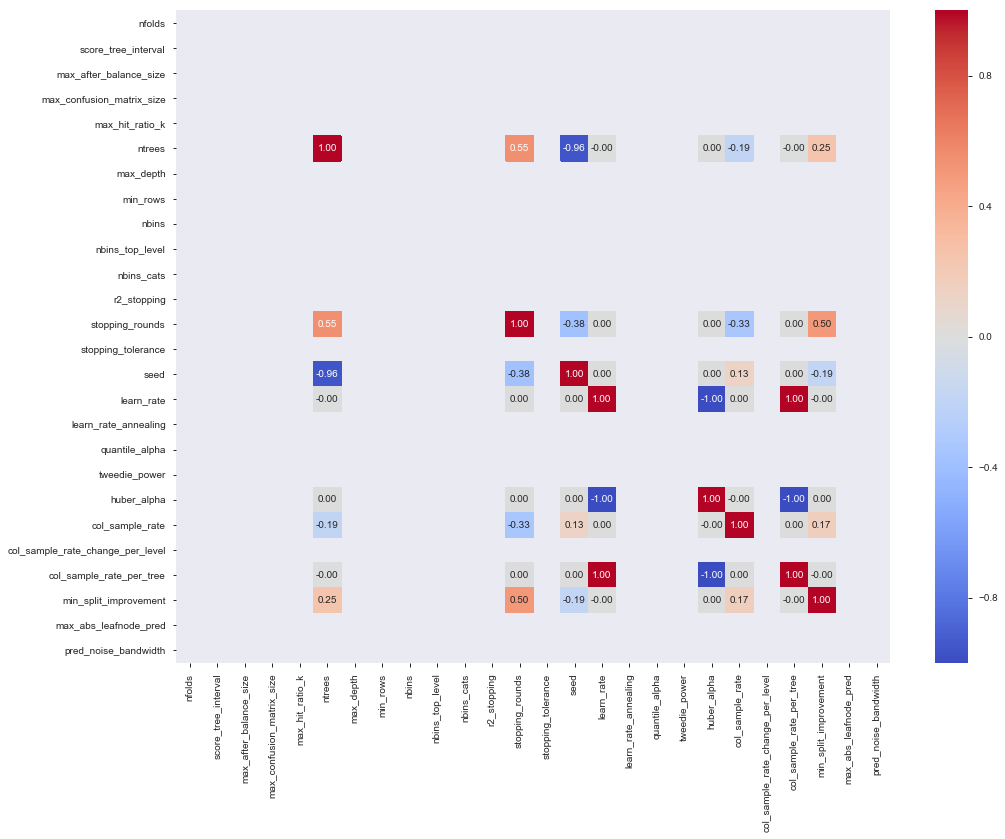

In [334]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_gbm.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

#### Based on the above heatmap, we observe that ntrees, stopping_rounds and seed are important hyperparameters for GBM model. We will see the range of only these 3 hyperparameters.

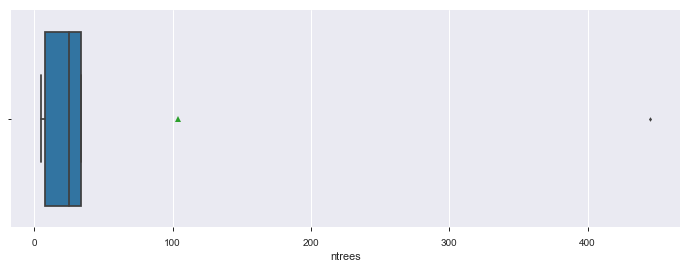

In [338]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = df_gbm["ntrees"], data = df_gbm, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

The above boxplot is the visualization of distribution of values for ntrees hyperaparameter 

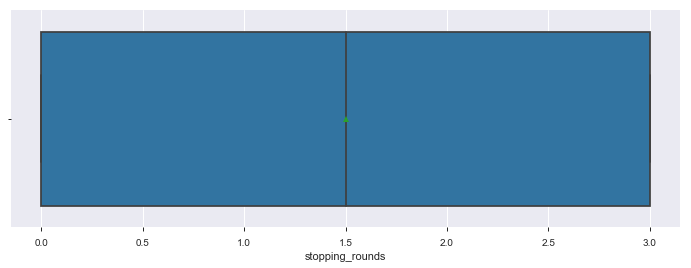

In [339]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = df_gbm["stopping_rounds"], data = df_gbm, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

The above boxplot is the visualization of distribution of values for stopping rounds hyperaparameter 

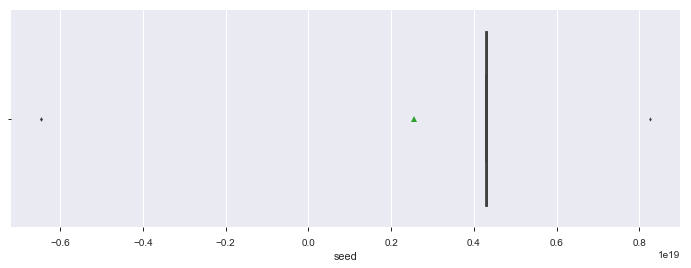

In [341]:
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = df_gbm["seed"], data = df_gbm, orient = 'h', width = 0.8, fliersize = 3, showmeans=True, ax = ax)
plt.show()

The above boxplot is the visualization of distribution of values for seed hyperaparameter 

In [343]:
treemin=df_gbm['ntrees'].min()
treemax=df_gbm['ntrees'].max()
seedmin=df_gbm['seed'].min()
seedmax=df_gbm['seed'].max()
srmin=df_gbm['stopping_rounds'].min()
srmax=df_gbm['stopping_rounds'].max()

### 2. Analysing the range of important hyperparameters across all run times

In [344]:
GBM_all = pd.DataFrame({
    'Hyperparameters': ['ntrees', 'Stopping_round', 'seed'],
    'Min': [treemin,srmin,seedmin],
     'Max': [treemax,srmax,seedmax]})
GBM_all

,Hyperparameters,Min,Max
0,ntrees,5.000000e+00,4.450000e+02
1,Stopping_round,0.000000e+00,3.000000e+00
2,seed,-6.460620e+18,8.254820e+18


## Conclusion -

### GLM

On generating the different models for different runtimes - most of the hyperparameters are same across all the models and runtimes - nfolds[5,5] for all the algorithm, seed with varying ranges, max_after_balance_size [5,5] for all the models, max_hit_ratio_k[0,0] for all the above mentioned leaderboard models, max_confusion_matrix_size[0,0] and max_iterations. Therefore these are all the mostly used hyperparameters across all the models in this dataset.

Also the early_stopping hyperparameter was also found to be mostly used across all models but with the different range of [0,1] with the 0 values being mostly used in all the models in the leaderboard.

Uisng heatmap and pandas profiling we concluded that the seed hyperparameter is the best with the range of  [-6.3e+18, -1.0] for the GLM algorithm specifically, amongst the leaderboard models with the values varying as -1 being the maximum for 300 seconds of runtime and -6.30e+18 being the least for 1500 and 2000 seconds of runtimes.

### GBM

By comparing all 5 runtime for GBM model:

The range for most of the Hyperparameters remain same throughout all runtime.</br>

Hyperparameter ntrees value was 17 in 300 seconds runtime, 5 in 500 seconds, 34 in 1000 seconds and 445 in 2000 seconds. As and when the run time increased, ntrees value also increased.</br>

Hyperparameter Stopping_rounds value was 0 in 300 seconds runtime, 0 in 500 seconds, 3 in 1000 seconds and 3 in 2000 seconds. As and when the run time increased, Stopping_rounds value also increased. A significant increase in runtime changed the value of hyperparameter.</br>

Hyperparameter seed value was 4.28813E+18 in 300 seconds runtime, 4.3094E+18 in 500 seconds,4.3094E+18 to 8.25482E+18 in 1000 seconds and -6.46062E+18 in 2000 seconds. As and when the run time increased, seed value also increased and then further decreased after certain point.</br>

## Contributions -

1. Performed data cleaning by checking for null values, data tyep conversions, replacing them with placeholder values along with EDA.                                                 
2. Generated models using h2o on deciding the target variable on the dataset for different runtimes - 300, 500,1000, 1500 and 2000 seconds.Stored the models on fetching the same from the leaderboard.
3. Extracted the hyperparameters from each models on running and stored them to json format to give it to DB teams and coordinated with them and also prepared csv files for our analysis.
4. Added necessary comments, required observations on analysis after every results and explanations to the code.
5. Analysed different hyperparameters across several models and identified  the best hyperparameters across all the models and across different runtimes using heatmap, pandas-profiling and range metrics.


### Personal contribution: 40% External references: 60%

## Citations

1. https://github.com/skunkworksneu/IIT-AGNE-Workshop                                                          
2. https://github.com/nikbearbrown/CSYE_7245/tree/master/H2O                                                    
3. https://github.com/prabhuSub/Hyperparamter-Samples                                               
4. https://h2o-release.s3.amazonaws.com/h2o/rel-vajda/1/docs-website/h2o-docs/grid-search.html                                
5. https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624                                               
6. https://towardsdatascience.com/demystifying-hyper-parameter-tuning-acb83af0258f                                                                           
7. https://topepo.github.io/caret/random-hyperparameter-search.html         
8. https://scikit-learn.org/stable/modules/linear_model.html
9. https://xcorr.net/2011/12/07/optimizing-glm-hyperparameters-through-the-evidence/
10. https://github.com/h2oai/h2o-3/blob/master/h2o-11. 
11. https://www.kaggle.com/c/zillow-prize-1/discussion/35234 
12. https://www.slideshare.net/0xdata/glm-gbm-in-h2o 

## LICENSE

License
Copyright 2019 Sahana Jangali, Chaitanya Prasanna Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.